# __Quickstart__

In this notebook, we cover the basics of `adelie`.

In [1]:
import adelie as ad
import numpy as np
import matplotlib.pyplot as plt

## __Basic Usage__

### __Data Preparation__

Before using `adelie`, we assume that the user has a feature matrix `X` and a response vector `y`.
For simplicity, we assume for now that `X` is a dense matrix,
although we will later see that `X` can be substituted with a custom matrix as well.
For demonstration, we will randomly generate our data.

In [2]:
n = 100     # number of observations
p = 1000    # number of features
seed = 0    # seed

np.random.seed(seed)
X = np.random.normal(0, 1, (n, p))
y = X[:, -1] * np.random.normal(0, 1) + np.random.normal(0, 1, n)

### __Solver__

`adelie.solver` is the sub-module that contains all solvers.
The highest-level function is `adelie.solver.grpnet`, 
which we also made visible under `adelie` for convenience.
We summarize a few important points `grpnet`:

- Although `grpnet` is in general a group lasso solver, 
    it can solve lasso problems as well,
    as it is a special case of the group lasso problem.
    `adelie` is written such that the lasso case is handled in a more optimized way.
- Since `grpnet` is a path-solver, 
    it will generate a path of regularizations and warm-start using the previous solution on the path.
    __For this reason, we recommend users to supply a sufficiently fine grid of lambdas or use the default path!__

We refer the readers to the documentation page on [grpnet](https://jamesyang007.github.io/adelie/generated/adelie.solver.grpnet.html#adelie.solver.grpnet) for more details.

#### __Lasso__


The most basic call to `adelie.grpnet` simply supplies the `X` and `y` data.
By default, `adelie.grpnet` will fit lasso by setting each feature as its own group.

In [3]:
state = ad.grpnet(
    X=X,
    y=y,
)

The output of `adelie.grpnet` is a _state_ object, which represents the state of the optimizer.
For most use-cases, the users do not need to inspect the internals of a state object,
with some exceptions:

In [4]:
state.betas         # (L, p) sparse matrix of solutions (one for each row)
state.intercepts    # (L,) intercepts
state.devs          # (L,) vector of % deviance explained
state.lmdas         # (L,) regularization at each saved solution
assert True         # barrier to not output anything

Otherwise, we recommend users to use our diagnostic class,
`ad.diagnostic.diagnostic`, to visualize aspects of the state.

In [5]:
dg = ad.diagnostic.diagnostic(state=state)

For example, we can plot the coefficients and the percent deviance explained.

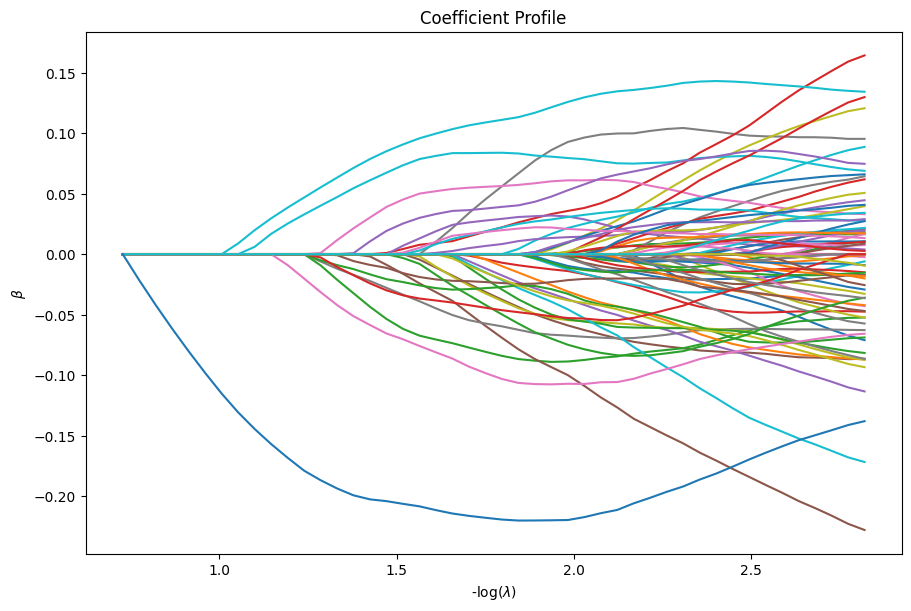

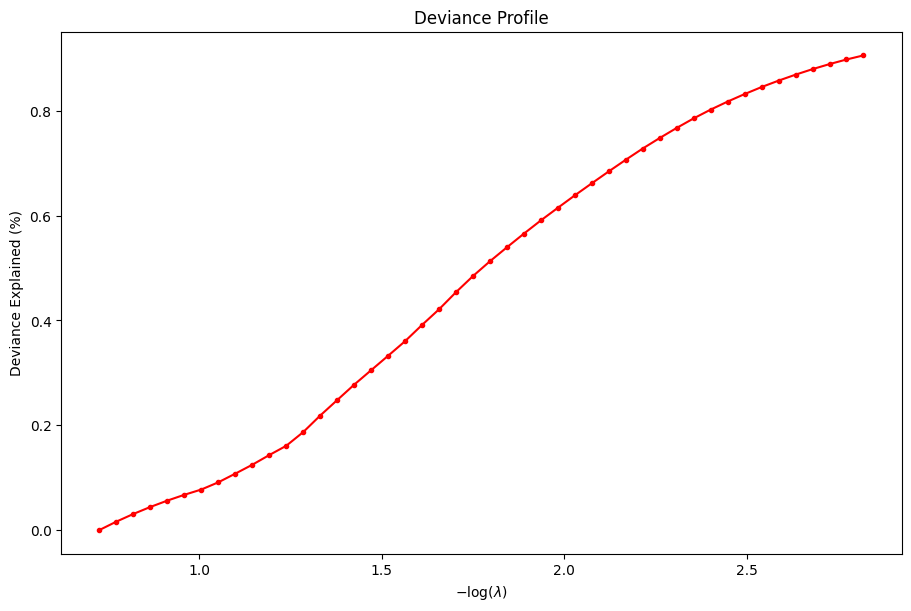

In [6]:
dg.plot_coefficients()
dg.plot_devs()
plt.show()

Serious developers may be interested in the performance of the solver.
We also provide a function to inspect the benchmark timings at each iteration of the solver.

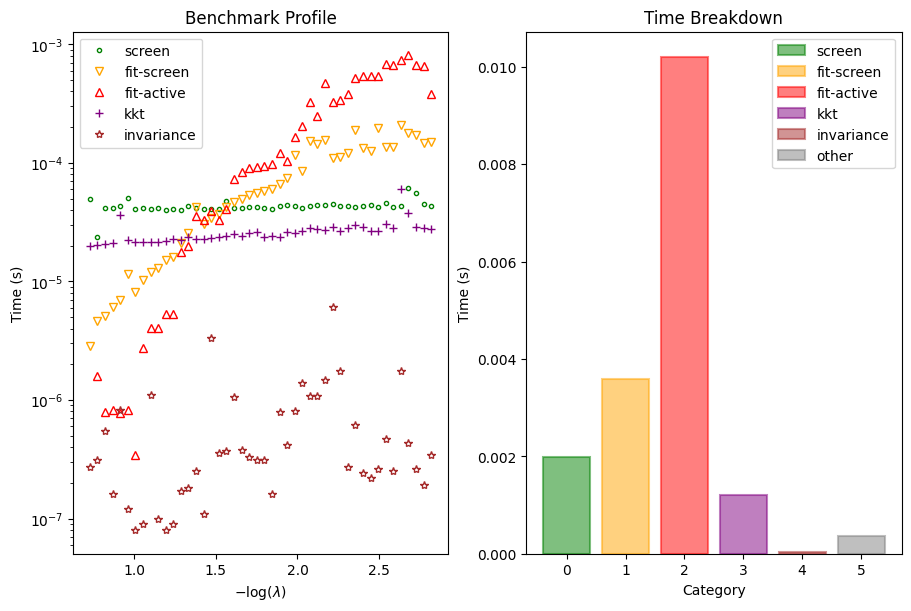

In [7]:
dg.plot_benchmark()
plt.show()

#### __Group Lasso__

To fit group lasso, the user simply needs to supply a `groups` argument that
defines the starting column index for each group.
For example, if there are `4` features grouped every two features,
then `groups = [0, 2]`.
For demonstration, we take the same data as before and group every `10` features.
In general, the user may define any _contiguous_ set of groups.
For example, `groups = [0, 2, 5]` with `10` total number of features results in `3` groups
with group sizes `[2, 3, 5]`, respectively.
We then fit group lasso using the same function.

In [8]:
state = ad.grpnet(
    X=X,
    y=y,
    groups=10*np.arange(X.shape[-1] // 10),
)

As before, we may inspect the same elements of `state` and diagnostics.

In [9]:
dg = ad.diagnostic.diagnostic(state=state)

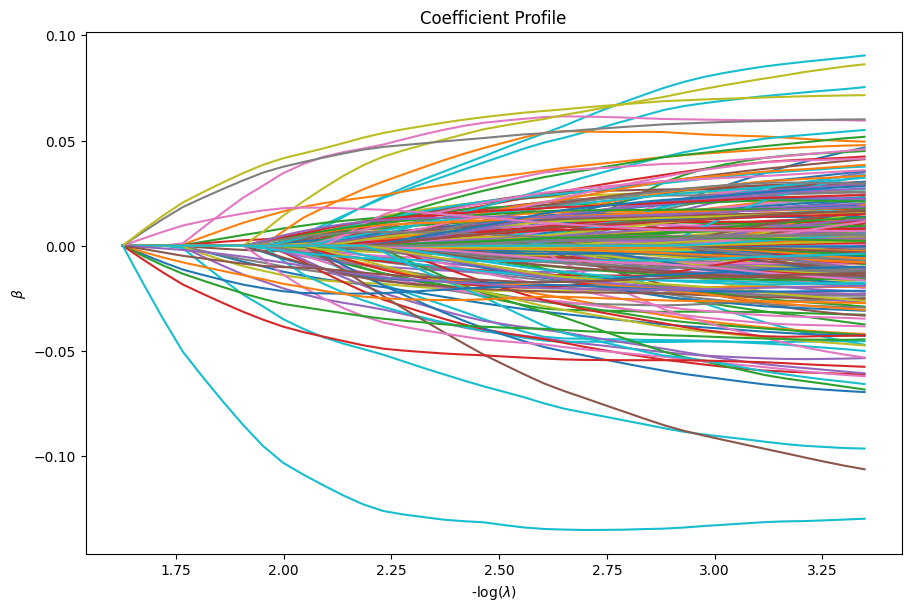

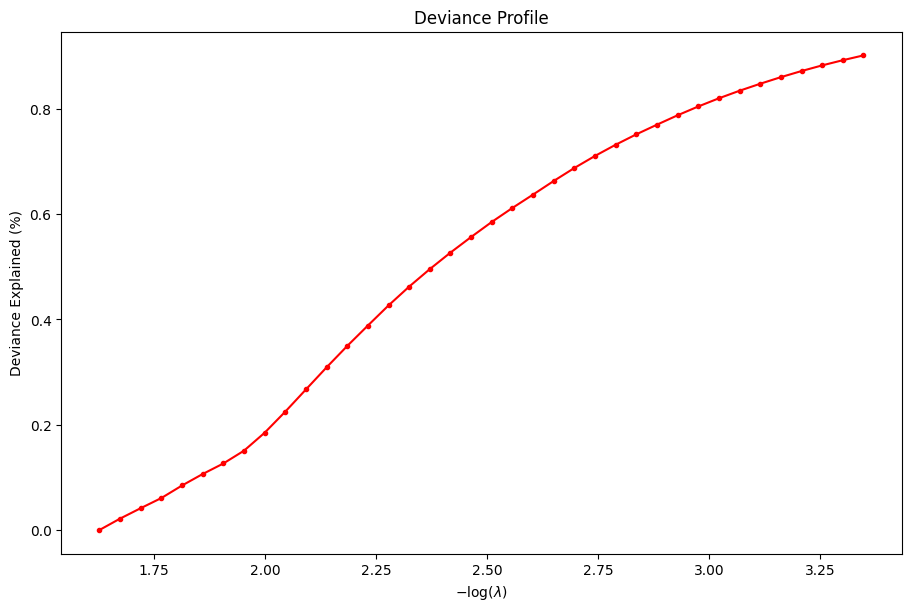

In [10]:
dg.plot_coefficients()
dg.plot_devs()
plt.show()

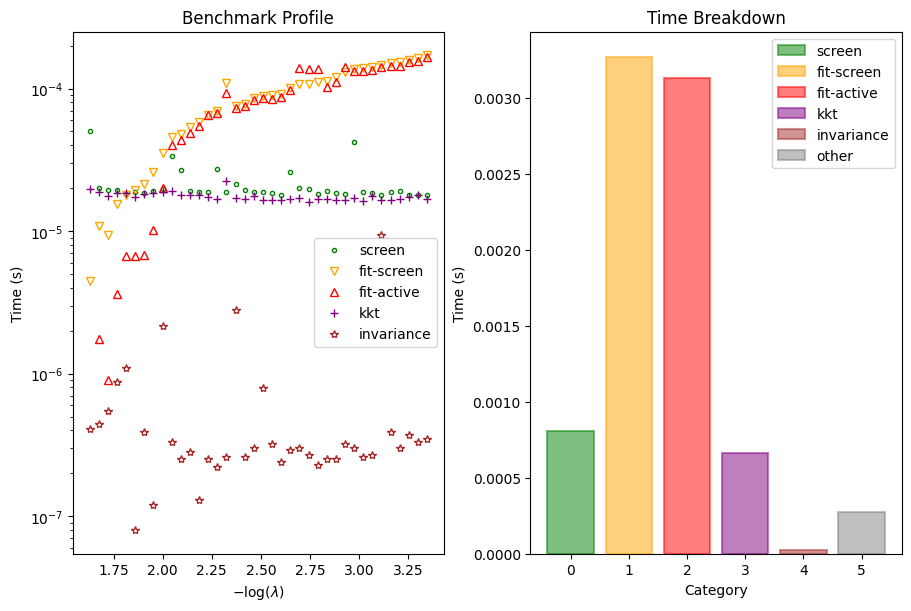

In [11]:
dg.plot_benchmark()
plt.show()